In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import pairwise_distances_argmin_min

170498071/170498071 [==============================] - 3s 0us/step
First 5 entries in the CIFAR-10 dataset:
Image 1:
Label: frog


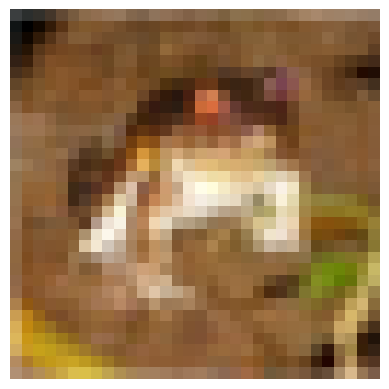

------------------------------
Image 2:
Label: truck


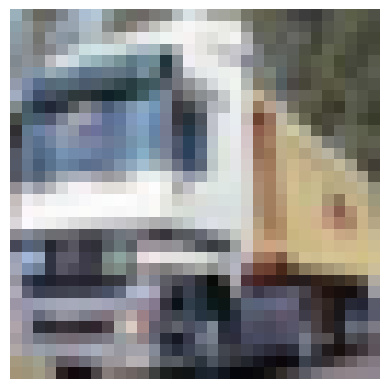

------------------------------
Image 3:
Label: truck


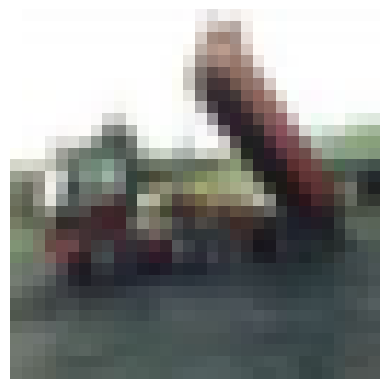

------------------------------
Image 4:
Label: deer


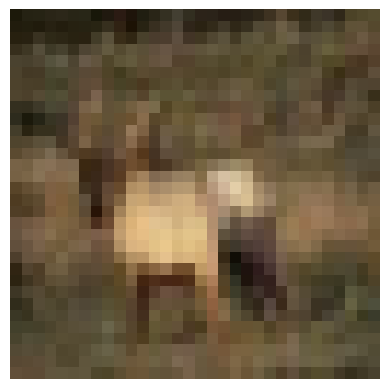

------------------------------
Image 5:
Label: automobile


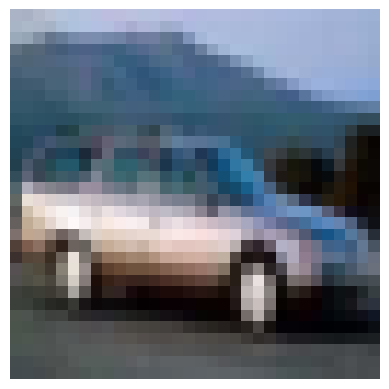

------------------------------


In [3]:


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#  class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
# Print the first 5 entries
print("First 5 entries in the CIFAR-10 dataset:")
for i in range(5):
    print(f"Image {i+1}:")
    print("Label:", class_labels[y_train[i][0]])
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.show()
    print("-" * 30)

In [5]:
# Basic statistics
num_train_samples = len(x_train)
num_test_samples = len(x_test)
image_shape = x_train[0].shape
num_classes = len(set(y_train.flatten()))

# Display the information
print("CIFAR-10 Dataset Description:")
print("-" * 30)
print("Number of training samples:", num_train_samples)
print("Number of test samples:", num_test_samples)
print("Image shape:", image_shape)
print("Number of classes:", num_classes)
print("Class labels:", set(y_train.flatten()))

CIFAR-10 Dataset Description:
------------------------------
Number of training samples: 50000
Number of test samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10
Class labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Data - Preprocessing

In [6]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the class labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
x_train = x_train.reshape(x_train.shape[0], -1)

## k-means using the elbow plot as the metric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

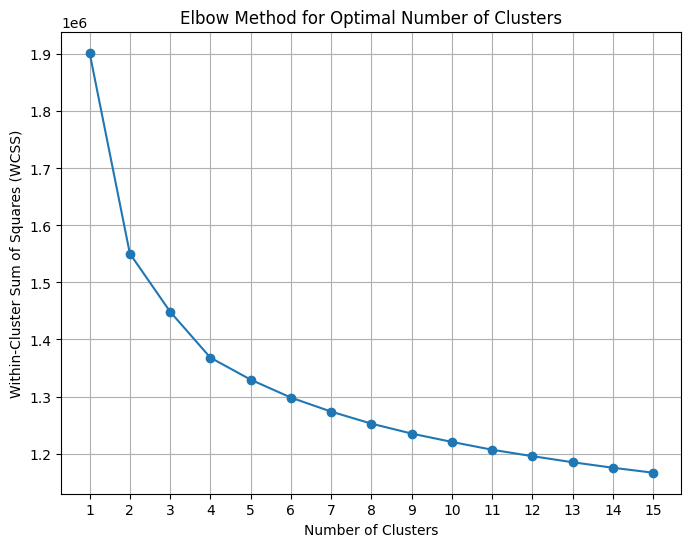

In [12]:
# Sample a subset of the data due to computational constraints
sample_size = 10000
idx = np.random.choice(x_train.shape[0], sample_size, replace=False)
x_sample = x_train[idx]

# Perform K-means clustering with varying number of clusters to identify the optimal k
max_clusters = 15
wcss = []
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_sample)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')of
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

the cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data. So based on the graph any value between 8 to 12 (inclusive ) is good-enough . I have chosen k = 10 as we know the dataset contains 10 labels .

In [6]:
def find_closest_samples(input_sample, kmeans_model):
    # Predict the cluster label for the input sample
    cluster_label = kmeans_model.predict(input_sample.reshape(1, -1))[0]

    # Get the indices of samples belonging to the predicted cluster
    cluster_indices = np.where(kmeans_model.labels_ == cluster_label)[0]

    # Compute distances between the input sample and all samples in the cluster
    distances = np.linalg.norm(input_sample.flatten() - x_train[cluster_indices].reshape(len(cluster_indices), -1), axis=1)

    # Find the indices of the 5 closest samples
    closest_indices = cluster_indices[np.argsort(distances)[:5]]

    return closest_indices

def print_closest_samples(closest_samples_indices, x_train):
    for idx in closest_samples_indices:
        sample_image = x_train[idx].reshape(32, 32, 3)  # Reshape the sample back to its original shape
        plt.imshow(sample_image)
        plt.axis('off')
        plt.show()

In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_model.fit(x_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [12]:
input_sample = x_test[0]
closest_samples_indices = find_closest_samples(input_sample, kmeans_model)

print("Indices of 5 closest samples in the cluster:", closest_samples_indices)

Indices of 5 closest samples in the cluster: [47188 17972 47837 22284 34669]


Closest samples in the cluster:


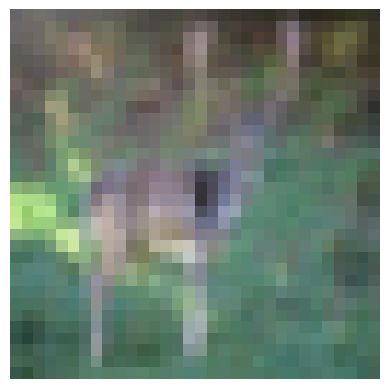

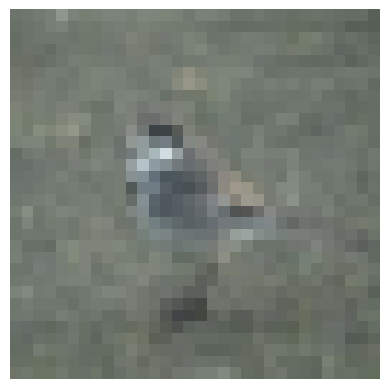

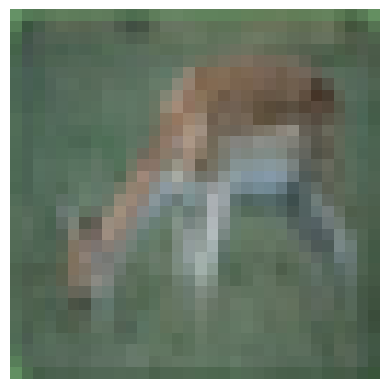

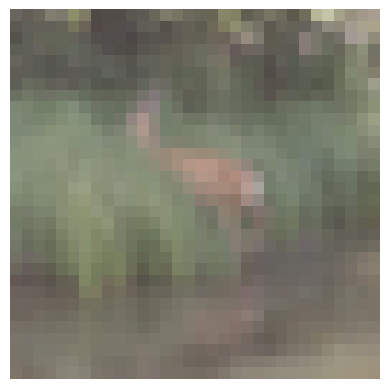

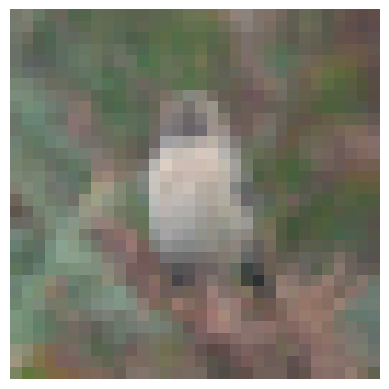

In [13]:
print("Closest samples in the cluster:")
print_closest_samples(closest_samples_indices, x_train)

##dunn index

In [6]:
from sklearn.metrics import pairwise_distances
def dunn_index(X, labels):
    # Calculate pairwise distances between samples
    distances = pairwise_distances(X)

    # Initialize values for minimum inter-cluster distance and maximum intra-cluster diameter
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = -np.inf

    # Iterate over each pair of clusters
    for i in range(len(np.unique(labels))):
        for j in range(i + 1, len(np.unique(labels))):
            # Calculate inter-cluster distance
            inter_cluster_distance = np.min(distances[labels == i][:, labels == j])

            # Update minimum inter-cluster distance if needed
            if inter_cluster_distance < min_inter_cluster_distance:
                min_inter_cluster_distance = inter_cluster_distance

        # Calculate intra-cluster diameter
        intra_cluster_diameter = np.max(distances[labels == i][:, labels == i])

        # Update maximum intra-cluster diameter if needed
        if intra_cluster_diameter > max_intra_cluster_diameter:
            max_intra_cluster_diameter = intra_cluster_diameter

    # Compute Dunn index
    dunn_index = min_inter_cluster_distance / max_intra_cluster_diameter

    return dunn_index


sample_size = 10000
idx = np.random.choice(x_train.shape[0], sample_size, replace=False)
x_sample = x_train[idx]
x_sample_flat = x_sample.reshape(x_sample.shape[0], -1)
# because of computational constraints we are using sample size = 10000
# Dictionary to store Dunn index for different k values
dunn_indices = {}

# Iterate over different values of k
for k in range(1, 13):
    # Fit KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(x_sample_flat)

    # Compute Dunn index
    dunn_indices[k] = dunn_index(x_sample_flat, kmeans_model.labels_)

# Print Dunn indices for different k values
print("Dunn Indices:")
for k, dunn_index_value in dunn_indices.items():
    print(f"k = {k}: Dunn Index = {dunn_index_value}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Dunn Indices:
k = 1: Dunn Index = inf
k = 2: Dunn Index = 0.09506007442517922
k = 3: Dunn Index = 0.11639147249833015
k = 4: Dunn Index = 0.10688452702726958
k = 5: Dunn Index = 0.12019203039360805
k = 6: Dunn Index = 0.11175925721378506
k = 7: Dunn Index = 0.10951356705111143
k = 8: Dunn Index = 0.10864363305866248
k = 9: Dunn Index = 0.10864363305866248
k = 10: Dunn Index = 0.11489692089647394
k = 11: Dunn Index = 0.10951356705111143
k = 12: Dunn Index = 0.10963684950284795



As for k = 5 we have the maximum value of dunn index we will choose this value of k

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_model.fit(x_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [7]:
input_sample = x_test[0]
closest_samples_indices = find_closest_samples(input_sample, kmeans_model)

print("Indices of 5 closest samples in the cluster:", closest_samples_indices)

Indices of 5 closest samples in the cluster: [17199 25006 20965 22443 37228]


Closest samples in the cluster:


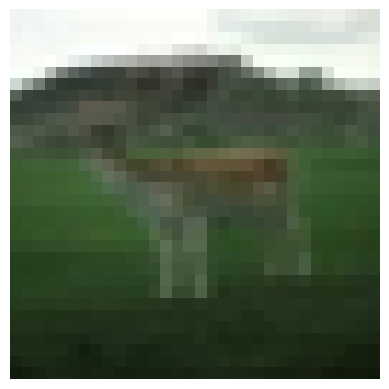

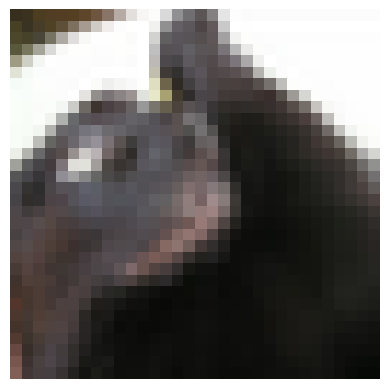

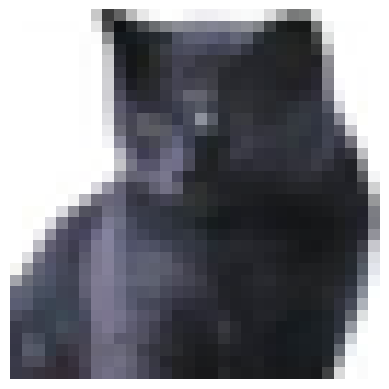

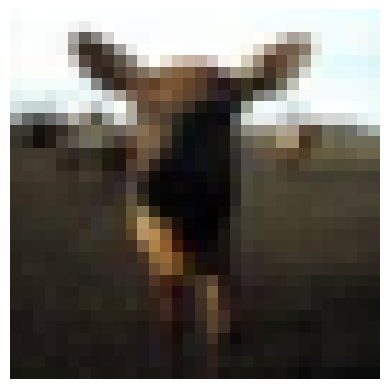

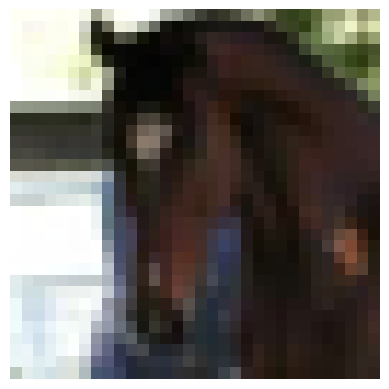

In [8]:
print("Closest samples in the cluster:")
print_closest_samples(closest_samples_indices, x_train)